### ALL COMMAND TESTING FILE

In [1]:
from DNA_analyser_IBP import Api # import OK

In [2]:
API = Api() # login OK

2020-10-13 14:10:14.227958 [INFO]: User host is trying to login ...
2020-10-13 14:10:46.217234 [ERROR]: HTTPConnectionPool(host='bioinformatics.ibp.cz', port=8099): Max retries exceeded with url: /api/jwt (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f09fe980ac8>: Failed to establish a new connection: [Errno 110] Connection timed out',))
2020-10-13 14:10:46.217686 [ERROR]: User host cannot be logged in. Either server problem or wrong login information, please try again!


### G4KILLER AND P53 TEST

In [ ]:
# API.g4killer.run(complementary=False, sequence='ATACCCCCCGCCC', threshold=1.2) # g4killer OK

API.g4killer.run_multiple(complementary=False,
                          sequences=['GCGGTGTCGGAGGGGGCCCCG', 'GCGCCGGGAGGCGAACGGGG', 'GGGGCTGGGCGGAGTCTCGGGG', 'GGGGGCCCGGAGCTGGGGCTGTGG', 'GGGACCGGAGTGGGGACGGGCGGAGG', 'GGGGGAAGGTCGGCGGCCGGGTCGG', 'GGCTTCTGCGGGGTCCTCAAGGGAGGGCG', 'GGGTGCGAGGGGAGCTGGGCCAGCGAG', 'GCTTCTGGTCGGGGAGGGGGGGAG', 'GACGTGGGGTCCGAGGGGAGGGGAAG', 'GTGCAAGCGGCGGGGTGTGGGGGGCGCCTCAGGGG', 'GCTTGCACAGGGGCGCGGGGGGCTGCGAGGCCGGAGCGGGGGTGG'],
                          threshold=1.2)

In [ ]:
# API.p53_predictor.run(sequence='ATCCCCCCCCCCCCCCCCCA') # p53 OK
API.p53_predictor.run_multiple(sequences=['ATCCCCCCCCCCCCCCCCCA','ATCCCCCCCCTTTCCCCCCA','ATCCCCCCCCCCCCCCGGCA'])


### SEQUENCE TEST

In [5]:
API.sequence.load_all()

,id,name,type,tags,length,circular,created,ncbi,fasta_comment,gc_count,nucleic_count
0,7367b11e-7bfa-4373-b4a0-f06e10282770,Test sequence 1 G6C-4x,DNA,,27,False,2020-09-21T17:05:09.750+0000,None,None,None,None
1,d2f72a14-c169-488b-bb97-16b74d05a7f2,Test sequence 2 C6G-4x,DNA,,27,False,2020-09-21T17:05:09.753+0000,None,None,None,None
2,0703f6a6-1377-4a18-9158-0d335bd31168,Test sequence 3 Human telomere repeat 9x,DNA,,51,False,2020-09-21T17:05:09.755+0000,None,None,None,None
3,4a20cd43-9d6a-46c3-bf97-198aabeab8bc,Test sequence 4 NC_001357.1 Human papillomavirus,DNA,,7857,False,2020-09-21T17:05:09.757+0000,NC_001357.1,None,None,None
4,105b1557-5a07-4f65-afbd-0e9a29de0f69,Test sequence 5 NC_012920.1 Homo sapiens mitoc...,DNA,,16569,True,2020-09-21T17:05:09.758+0000,NC_001357.1,None,None,None


In [6]:
SEQUENCE_ID = API.sequence.load_all().iloc[0]["id"]

API.sequence.load_by_id(id=SEQUENCE_ID)

,id,name,type,tags,length,circular,created,ncbi,fasta_comment,gc_count,nucleic_count
0,7367b11e-7bfa-4373-b4a0-f06e10282770,Test sequence 1 G6C-4x,DNA,,27,False,2020-09-21T17:05:09.750+0000,None,None,None,None


In [7]:
API.sequence.load_data(
    sequence=API.sequence.load_by_id(id=SEQUENCE_ID),
    length=20,
    position=0
) # OK with DataFrame

'ATGAAAGCATTCTGGCGTAA'

In [8]:
API.sequence.load_data(
    sequence=API.sequence.load_by_id(id=SEQUENCE_ID).iloc[0],
    length=20,
    position=0
) # OK with Series

'ATGAAAGCATTCTGGCGTAA'

In [9]:
API.sequence.delete(sequence=API.sequence.load_by_id(id=SEQUENCE_ID).iloc[0]) # OK with DataFrame also Series

2020-09-10 18:20:27.609663 [INFO]: Sequence 987acc67-5714-47b1-b56f-1dc56ded7c87 was deleted!


In [10]:
API.sequence.nucleic_count(sequence=API.sequence.load_all().iloc[0])

2020-09-10 18:20:30.871403 [INFO]: Sequence 090e5461-6dd3-44ff-8e01-7b84435857fa nucleotides was re-counted!


In [6]:
API.sequence.text_creator(
    circular=True,
    tags=['test'],
    nucleic_type='DNA',
    string='ATACACACGGGAGAGAG',
    name='testovaci'
)

Uploading sequence -> testovaci: 100 % [00:01, 64.27 %/s]


http://bioinformatics.ibp.cz:8888/api/batch/cz.mendelu.dnaAnalyser.sequence.Sequence/9f2a53cb-ea76-44bc-88e1-144e79496cae
{'name': 'Import plain format: testovaci', 'status': 'FINISH', 'created': '2020-09-19T19:54:46.659+0000'}


In [3]:
API.sequence.ncbi_creator(
    tags=['test'],
    circular=False,
    name='testovaci shit',
    ncbi_id='NC_003070.9'
)

Uploading sequence -> testovaci_shit: 50 % [00:50,  1.01s/ %]


START
END
2020-09-20 19:44:55.217330 [ERROR]: Server not responding, please retry again!


In [3]:
API.sequence.file_creator(
    tags=['test'],
    circular=True,
    nucleic_type='DNA',
    name='testovaci_shit',
    format='FASTA',
    path='/home/patrikkaura/Downloads/rloop.fasta'
)

Uploading sequence -> testovaci_shit: 100 % [00:01, 85.31 %/s]


### G4HUNTER

In [14]:
API.g4hunter.analyse_creator(
    tags=['test'],
    sequence=API.sequence.load_all().iloc[2],
    threshold=1.2,
    window_size=25
)

Analysing sequence -> Homo_sapiens_chromosome_12: 100 % [01:02,  1.61 %/s]


In [15]:
API.g4hunter.load_all()

,id,title,tags,created,finished,sequence_id,result_count,threshold,frequency,window_size
0,1ec02567-17dc-4115-9d2f-dba9812b9a3f,Analyse G4 1,demo,2018-03-27T17:57:38.911+0000,2018-03-27T17:57:39.550+0000,987acc67-5714-47b1-b56f-1dc56ded7c87,113,0.5,None,20
1,b0cfb3e7-1e31-45a2-8dbc-0b31a2b39876,Analyse G4 2,demo,2018-03-27T17:57:38.786+0000,2018-03-27T17:57:39.553+0000,090e5461-6dd3-44ff-8e01-7b84435857fa,124,0.5,None,20
2,dbe62826-7976-499e-87a6-28dd33218fb0,Escherichia coli str. K-12 substr. MG1655,Escherichia coli,2019-01-25T19:38:27.817+0000,2019-01-25T19:38:27.869+0000,987acc67-5714-47b1-b56f-1dc56ded7c87,0,1.5,0,25
3,75abc87d-6b4d-4c7b-820e-cdb18f1142c0,Escherichia coli str. K-12 substr. MG1655,Escherichia coli,2019-01-25T19:38:34.695+0000,2019-01-25T19:38:34.742+0000,987acc67-5714-47b1-b56f-1dc56ded7c87,0,2.0,0,25
4,db2db451-5fc0-4291-9f54-2511dd141c2b,Shigella flexneri 2a str. 301 chromosome,"Escherichia coli, Shigella flexneri",2019-01-25T19:39:03.853+0000,2019-01-25T19:39:03.916+0000,090e5461-6dd3-44ff-8e01-7b84435857fa,8,0.5,9.68523,25
5,a81a75bd-2935-4cca-8c81-e1cbfd30beeb,Escherichia coli str. K-12 substr. MG1655,"Escherichia coli, Shigella flexneri",2019-01-25T19:39:03.835+0000,2019-01-25T19:39:03.917+0000,987acc67-5714-47b1-b56f-1dc56ded7c87,7,0.5,8.6741,25
6,e1a393a8-69a0-4d88-a89e-7125cee65ed0,Shigella flexneri 2a str. 301 chromosome,Shigella flexneri,2019-03-23T15:33:43.467+0000,2019-03-23T15:33:43.557+0000,090e5461-6dd3-44ff-8e01-7b84435857fa,1,0.9,1.21065,25
7,27ca4139-c135-4540-a55c-7114f32b4525,Escherichia coli str. K-12 substr. MG1655,Escherichia coli,2019-10-15T13:46:34.898+0000,2019-10-15T13:46:36.136+0000,987acc67-5714-47b1-b56f-1dc56ded7c87,0,1.4,0,25
8,1ed8fad6-9e3a-4efb-83c8-bc4861bdfb47,None,,2019-10-15T13:46:24.941+0000,2019-10-15T13:46:39.430+0000,e47289af-3d6a-42a1-83ff-5ea86e230a03,38138,1.4,1.23412,25
9,bdd17fef-1432-4fce-8685-96f75bd7a842,None,,2019-10-15T13:46:47.996+0000,None,e47289af-3d6a-42a1-83ff-5ea86e230a03,None,0.0,None,25


In [16]:
API.g4hunter.load_by_id(id=API.g4hunter.load_all().iloc[0]['id'])

,id,title,tags,created,finished,sequence_id,result_count,threshold,frequency,window_size
0,1ec02567-17dc-4115-9d2f-dba9812b9a3f,Analyse G4 1,demo,2018-03-27T17:57:38.911+0000,2018-03-27T17:57:39.550+0000,987acc67-5714-47b1-b56f-1dc56ded7c87,113,0.5,None,20


In [17]:
API.g4hunter.delete(analyse=API.g4hunter.load_all().iloc[0])

2020-09-10 18:23:16.281657 [INFO]: G4hunter analyse 1ec02567-17dc-4115-9d2f-dba9812b9a3f was deleted!


In [22]:
API.g4hunter.get_heatmap_data(analyse=API.g4hunter.load_all().iloc[-1], segments=10)

,PQS_count,PQS_coverage
0,73213.0,0.144392
1,14147.0,0.028974
2,13434.0,0.027183
3,26955.0,0.053887
4,25304.0,0.051540
5,14262.0,0.029247
6,11660.0,0.024284
7,19843.0,0.040423
8,34049.0,0.068183


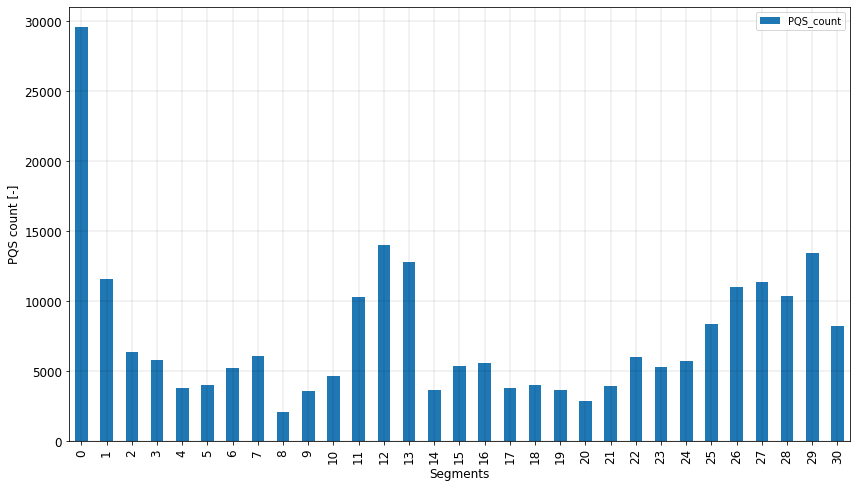

In [24]:
API.g4hunter.show_heatmap(analyse=API.g4hunter.load_all().iloc[-1], segments=32)

In [25]:
API.g4hunter.load_results(analyse=API.g4hunter.load_all().iloc[-1])

,id,position,length,score,absScore,sequence,subScoreList
0,1,9998,590,-1.659322,1.659322,NNCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCT...,"[-1.24, -1.36, -1.48, -1.44, -1.44, -1.44, -1...."
1,2,10589,26,-1.115385,1.115385,GTACCCTCAGCCGGCCCGCCCGCCCG,"[-1.28, -1.24]"
2,3,10973,26,1.153846,1.153846,AGGGGAGGAGGCGTGGCGCAGGCGCA,"[1.2, 1.2]"
3,4,11020,26,1.153846,1.153846,AGGGGAGGAGGCGTGGCGCAGGCGCA,"[1.2, 1.2]"
4,5,11096,25,1.200000,1.200000,GGGGTGGAGGCGTGGCGCAGGCGCA,[1.2]
...,...,...,...,...,...,...,...
232862,232863,133262223,47,-1.148936,1.148936,GTATTTCCTAGCCTGTCCCCTTCCCCATTTCCCTACCACTACTTCTC,"[-1.32, -1.52, -1.52, -1.52, -1.52, -1.52, -1...."
232863,232864,133262955,35,-0.942857,0.942857,TGTATCTGACCCCCATCATCCCATCCTAGCAAAGC,"[-1.24, -1.32, -1.36, -1.36, -1.32, -1.36, -1...."
232864,232865,133264258,32,1.093750,1.093750,CGGCGCGGGGGGCCTTTGCGAGGGCGGAGCTG,"[1.2, 1.36, 1.36, 1.28, 1.36, 1.28, 1.32, 1.2]"
232865,232866,133264350,44,1.159091,1.159091,CAGACGCGGGCGGTTGGGTGGGACGGGGGCTCCGCGAGGTCGGA,"[1.28, 1.48, 1.64, 1.76, 1.92, 1.92, 1.88, 1.8..."


In [26]:
API.g4hunter.export_csv(aggregate=True, analyse=API.g4hunter.load_all().iloc[0], path='./')

2020-09-10 18:24:00.239565 [INFO]: file created -> ./Analyse_G4_2_result.csv


### RLOOPR

In [4]:
API.rloopr.analyse_creator(
    sequence=API.sequence.load_all().iloc[-1],
    tags=['test'],
    riz_2g_cluster=False,
    riz_3g_cluster=False
)

Analysing sequence -> testovaci_shit: 100 % [00:01, 88.73 %/s]


In [5]:
API.rloopr.load_all()

,id,title,tags,created,finished,sequence_id,model,result_count
0,f06a96ca-7a5f-4582-9f8a-315c032c27a1,testovaci_shit,test,2020-09-16T16:51:25.783+0000,2020-09-16T16:51:26.000+0000,f7b35be5-a334-4d5e-b4c8-0c9312feed40,2,8


In [6]:
API.rloopr.load_by_id(id=API.rloopr.load_all().iloc[0]['id'])

,id,title,tags,created,finished,sequence_id,model,result_count
0,f06a96ca-7a5f-4582-9f8a-315c032c27a1,testovaci_shit,test,2020-09-16T16:51:25.783+0000,2020-09-16T16:51:26.000+0000,f7b35be5-a334-4d5e-b4c8-0c9312feed40,2,8


In [7]:
API.rloopr.delete(analyse=API.rloopr.load_all().iloc[0])

2020-09-16 18:45:44.390393 [INFO]: RLoopr analyse 417a3642-018a-4979-8a7c-7f224e64752b was deleted!


In [7]:
API.rloopr.load_results(analyse=API.rloopr.load_all().iloc[0])

,position,length,riz,rizGRichness,linker,rez,rloopGRichness,g3cnt,g4cnt,id,model,strand,gncnt
0,194,126,GGGAGCGAGCGGGCGGCCGGCTAGGG,0.615385,,TGGAAGAGCCGGGCGAGCAGAGCTGCGCTGCGGGCGTCCTGGGAAG...,0.444444,8,1,1,RIZ 3G cluster (m1),+,1
1,1602,417,GGGGGCGGTACTGGGGGTGGGG,0.727273,,ACGGGGGCGGTGGAGAGGGAAGGTTGGGAGGGGCTGCGGTGCCGGC...,0.417266,23,13,2,RIZ 3G cluster (m1),+,7
2,1626,201,GGGGGCGGTGGAGAGGGAAGGTTGGG,0.692308,,AGGGGCTGCGGTGCCGGCGGGGGTAGGAGAGCGGCTAGGGCGCGAG...,0.437811,9,5,3,RIZ 3G cluster (m1),+,2
3,2541,365,GGGGCTCGGGGCTGCCCTGCGGGG,0.583333,A,GGACTCCGTCGAGGAGAGCAGAGAATCCGAGGACGGAGAGAAGGCG...,0.410959,11,6,4,RIZ 3G cluster (m1),-,0
4,1408,418,GGGGTGGCTCCGGGGG,0.687500,,AGGTATCGCAGCGGGGTCTCTGGCGCAGTTGCATCTCCGTATTGAG...,0.411483,17,12,5,RIZ 4G cluster (m2),+,5
5,1602,422,GGGGGCGGTACTGGGGG,0.705882,,TGGGGACGGGGGCGGTGGAGAGGGAAGGTTGGGAGGGGCTGCGGTG...,0.412322,23,13,6,RIZ 4G cluster (m2),+,7
6,1620,331,GGGGACGGGGG,0.818182,,CGGTGGAGAGGGAAGGTTGGGAGGGGCTGCGGTGCCGGCGGGGGTA...,0.413897,18,9,7,RIZ 4G cluster (m2),+,4
7,2529,377,GGGGCTCGGGG,0.727273,CTGCCC,TGCGGGGAGGACTCCGTCGAGGAGAGCAGAGAATCCGAGGACGGAG...,0.405836,11,6,8,RIZ 4G cluster (m2),-,0


In [11]:
API.rloopr.export_csv(analyse=API.rloopr.load_all(), path='./')

2020-08-31 21:32:56.740652 [INFO]: file created -> ./test_result.csv
